### Problam Statement

A US based company BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

We have two years data of rentals and The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.

Here the goal is to build a multiple linear regression model for the prediction of demand for shared bikes.


### 1. Reading and quick overlook of data

In [962]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [963]:
import warnings
warnings.filterwarnings('ignore')

In [964]:
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

In [965]:
# reading the dataset

df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [966]:
df.shape

(730, 16)

In [967]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [968]:
# dropping instant, date as it is not required
# also dropping casual, registered as these are just sub total of our target variable i.e. count
df.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)

In [969]:
df.info()

# No null values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [970]:
df.describe()

# Checking for any outliers in numeric field by min and max values, all values seems in valid range

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [971]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [972]:
# Some variables are categorical but datatype is not correct, so we should correct it


### 2. Visualisation to better get familiar with values

- To overlook for multicollinearity and any association between fields

<Figure size 2000x1200 with 0 Axes>

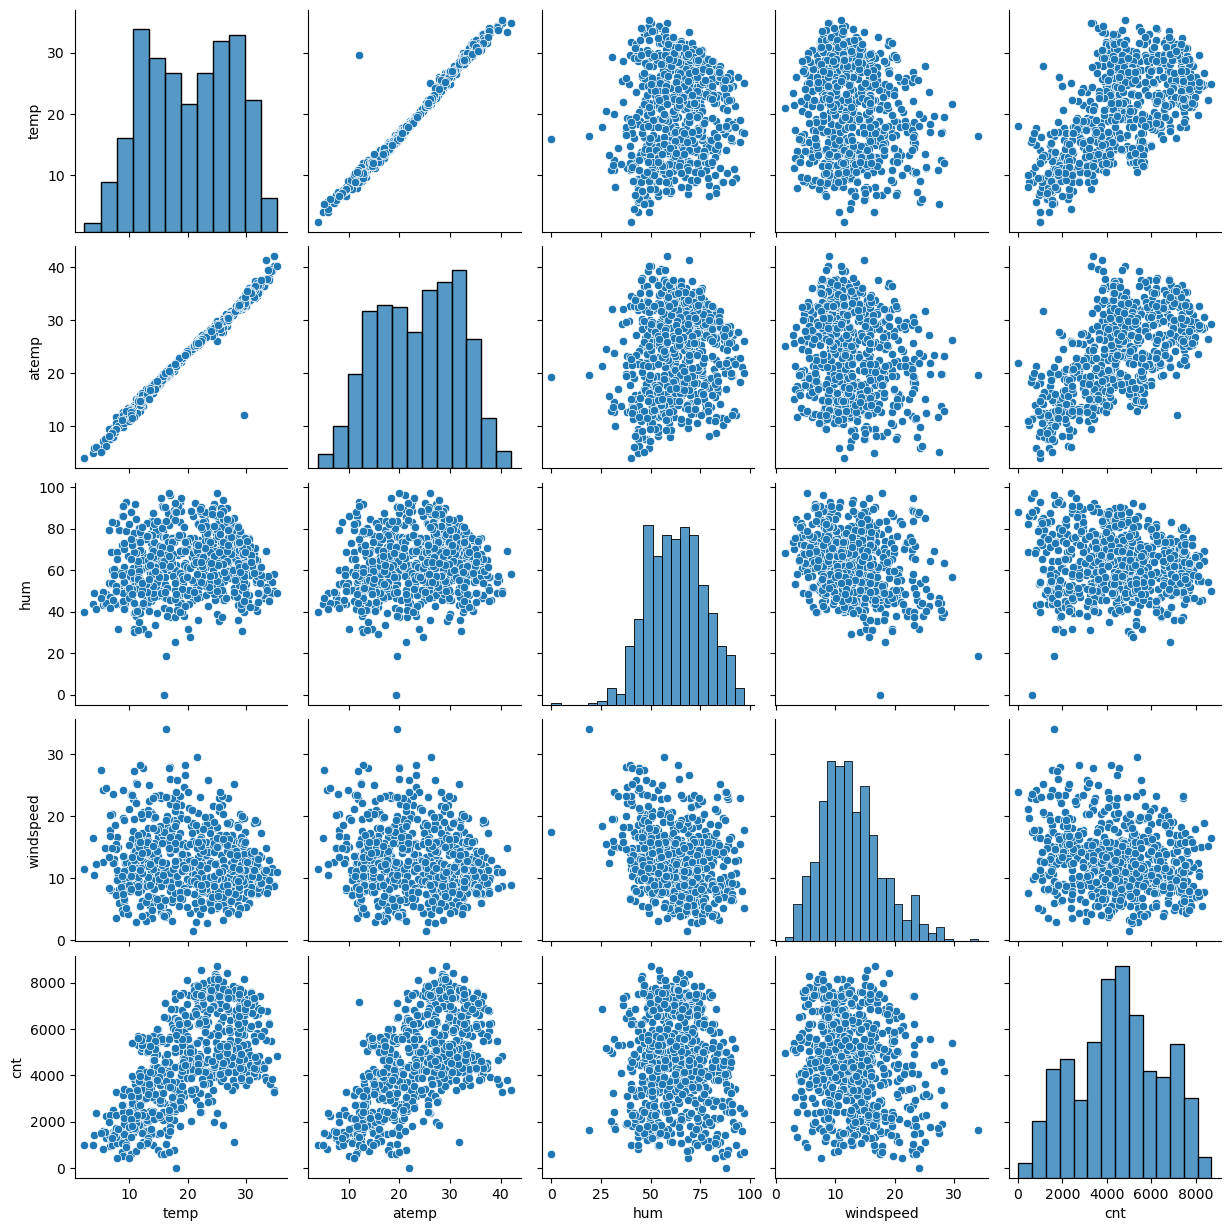

In [973]:
# visualising numeric data
plt.figure(figsize=(20,12))
sns.pairplot(df[['temp','atemp','hum','windspeed','cnt']])
plt.show()

In [974]:
# As we can see there is high co relation between temp and atemp, count and registered,
# There is some co relation between count and casual 

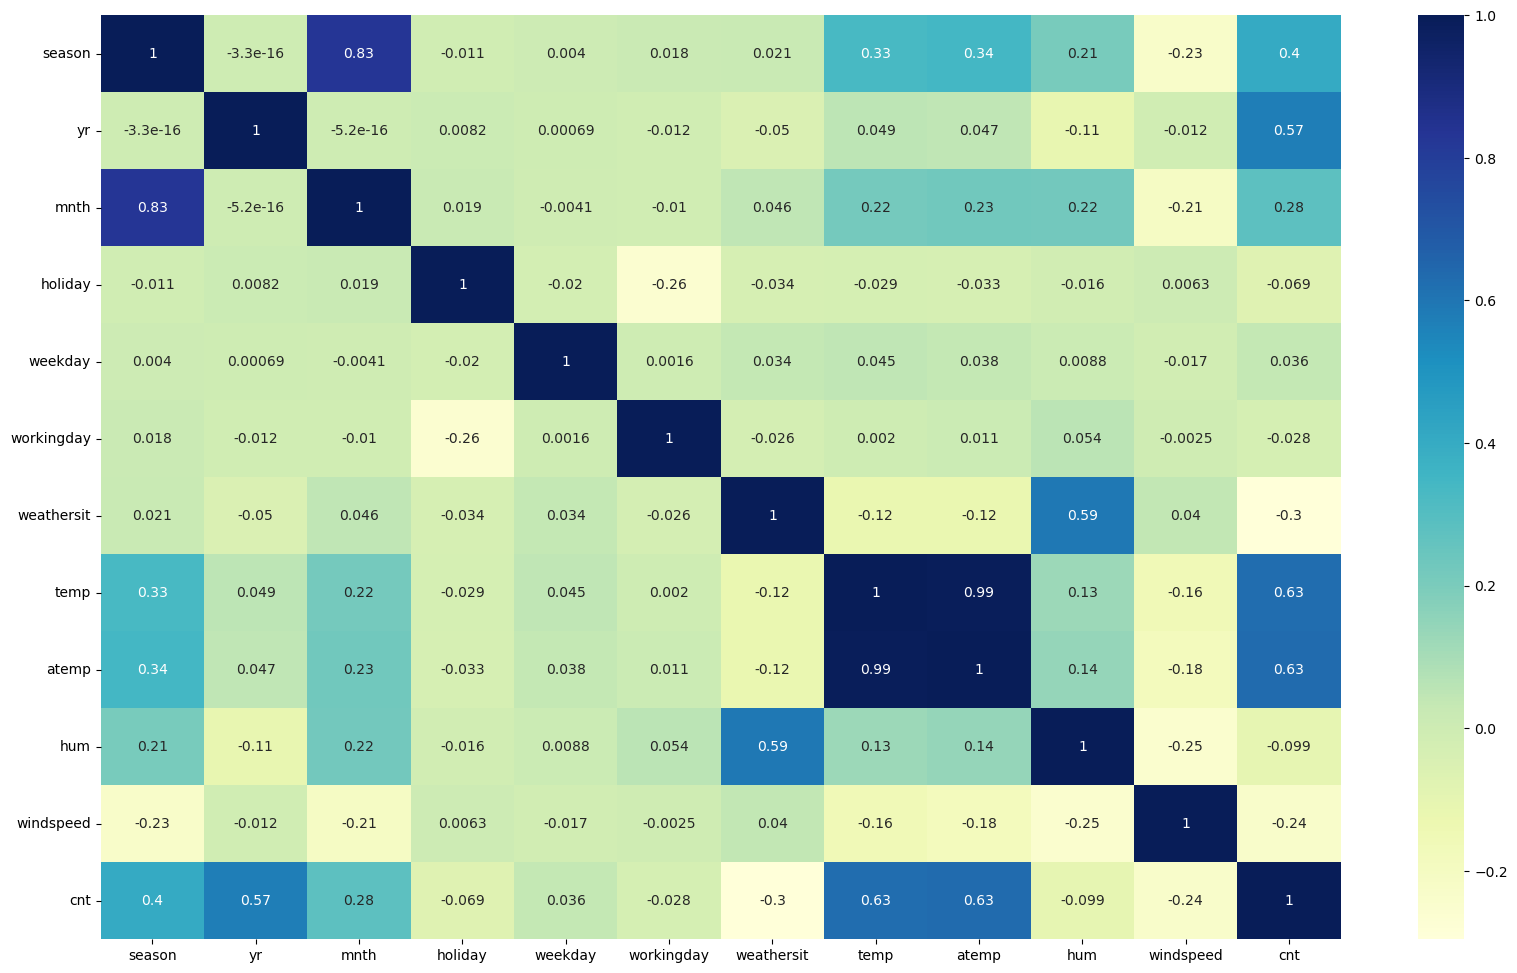

In [975]:
# Visualising through heatmap

plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

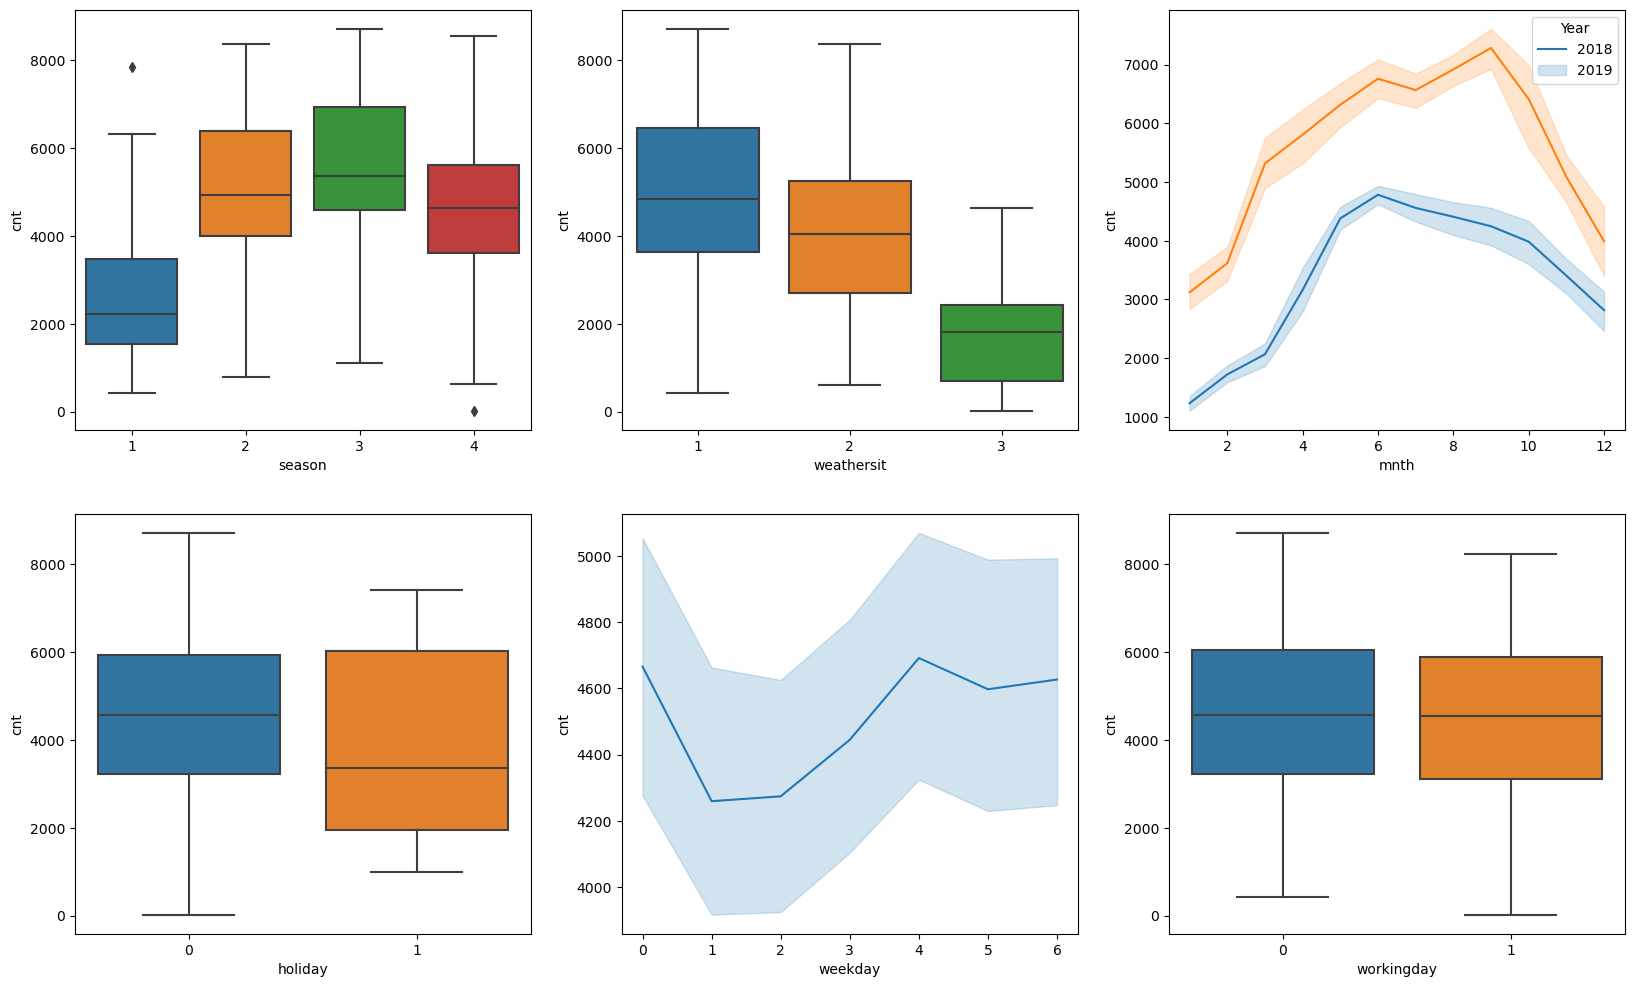

In [976]:
# visualising categorical fields

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.lineplot(x = 'mnth', y = 'cnt', hue='yr', data = df)
plt.legend(title='Year', labels=['2018', '2019'])
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.lineplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()


In [977]:
# We can see that Spring season has lower median and expect few days as outliers, max rental count is around 6000 per day
# In extrem bad weather there is no demand of bike rent, obvious
# In month trend we see start of the year and end of the year rental count is lower side
# If not holiday it seems better, monday & tuesday are lower side as we see in weekday trend

<!-- # Now we have sensed about the dataset and some insights in boxplots and lineplots,
# we should prepare the data for making the model -->

### 3. Preparing data

In [978]:
# There are some categorical fields which are already in numbers and we need to create dummy variables before making the model
# We have seasons and weathersit as categorical variables having more than 2 category values and needs dummy variables

In [979]:
dummy_season = pd.get_dummies(df['season'], drop_first = True)
dummy_season.rename(columns = {1:'spring',2:'summer',3:'fall',4:'winter'}, inplace = True)

# dropped spring field as all other seasons are if 0 then it would be spring season 

In [980]:
dummy_season.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [981]:
# we can do same for weathersit field
dummy_weathersit = pd.get_dummies(df['weathersit'], drop_first = True)
dummy_weathersit.rename(columns = {1:'clear',2:'mist',3:'light snow',4:'heavy rain'}, inplace = True)

In [982]:
dummy_weathersit.head()

# As we see there is no customer on heavy rainy day, so only 2 dummy variables are created, if not mist and light snow then
# it is clear weather

,mist,light snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [983]:
dummy_weekday = pd.get_dummies(df['weekday'], drop_first = True)
dummy_weekday.rename(columns = {0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'}, inplace = True)

In [984]:
dummy_weekday.head()

,mon,tue,wed,thu,fri,sat
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0


In [985]:
dummy_month = pd.get_dummies(df['mnth'], drop_first = True)
dummy_month.rename(columns = {1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}, inplace = True)

In [986]:
dummy_month.head()

,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [987]:
# Adding dummy variables to dataset
df = pd.concat([df,dummy_season,dummy_weathersit,dummy_weekday,dummy_month], axis=1)

In [988]:
df.drop(['season','weathersit','weekday','mnth'], axis=1, inplace=True)

In [989]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4. Splitting the data into train and test dataset

In [990]:
np.random.seed(0) # So that train data remains same each time
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [991]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,1,0,0,0,0,0,0,0,0
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,1,0,...,0,1,0,0,0,0,0,0,0,0


In [992]:
df_train.shape

(510, 30)

In [993]:
# Rescaling numeric fields
scaler = MinMaxScaler()

In [994]:
num_vars = ['cnt','temp','atemp','hum','windspeed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [995]:
# We now create Target as y and predictors as X
y_train = df_train.pop('cnt')
X_train = df_train

In [996]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,summer,fall,winter,...,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,...,0,1,0,0,0,0,0,0,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,1,0,0,...,0,1,0,0,0,0,0,0,0,0


### 5. Building the model

In [997]:
# checking all variables again
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   atemp       510 non-null    float64
 5   hum         510 non-null    float64
 6   windspeed   510 non-null    float64
 7   summer      510 non-null    uint8  
 8   fall        510 non-null    uint8  
 9   winter      510 non-null    uint8  
 10  mist        510 non-null    uint8  
 11  light snow  510 non-null    uint8  
 12  mon         510 non-null    uint8  
 13  tue         510 non-null    uint8  
 14  wed         510 non-null    uint8  
 15  thu         510 non-null    uint8  
 16  fri         510 non-null    uint8  
 17  sat         510 non-null    uint8  
 18  feb         510 non-null    uint8  
 19  mar         510 non-null   

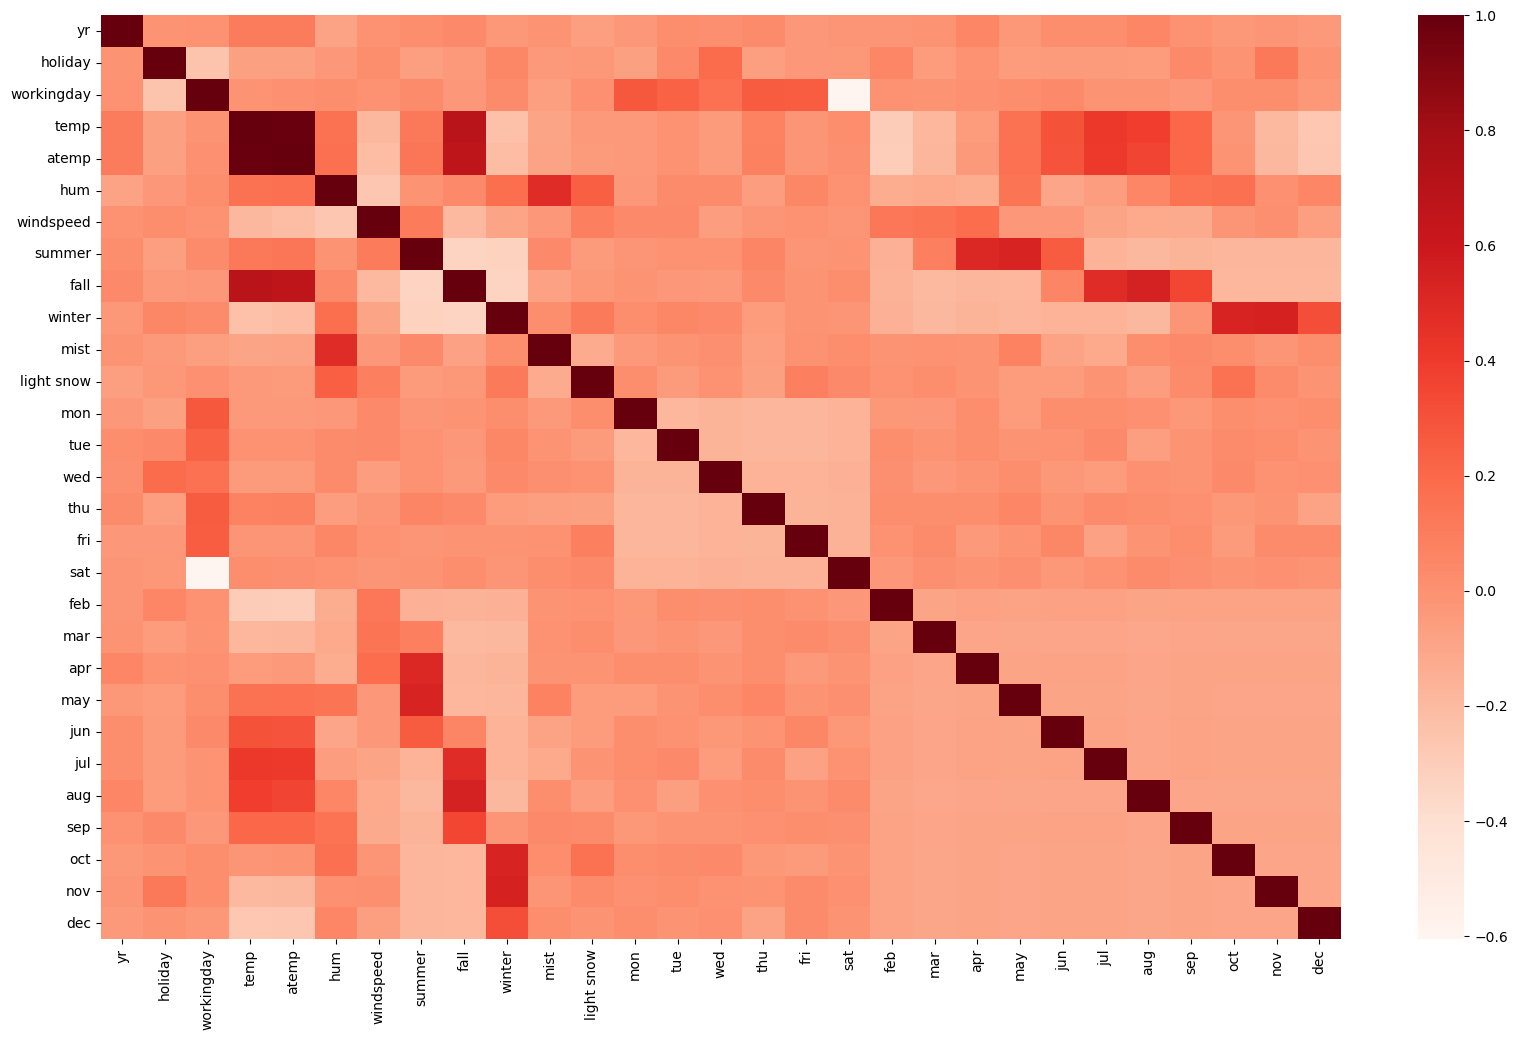

In [998]:
# Lets see corelations for multicollinearty check
plt.figure(figsize=(20,12))
colormap = sns.color_palette("Reds", as_cmap=True)
sns.heatmap(X_train.corr(), cmap=colormap)
plt.show()

In [999]:
# we can visualise now easilty which variables are corelated in above heatmap

In [1000]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'summer', 'fall', 'winter', 'mist', 'light snow', 'mon', 'tue', 'wed',
       'thu', 'fri', 'sat', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug',
       'sep', 'oct', 'nov', 'dec'],
      dtype='object')

### Model 1

In [1001]:
# Lets try all variables and see the model
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const         0.236688
yr            0.231219
holiday      -0.134550
workingday   -0.060477
temp          0.387322
atemp         0.054682
hum          -0.157869
windspeed    -0.180241
summer        0.086710
fall          0.040876
winter        0.152994
mist         -0.057807
light snow   -0.249238
mon           0.025218
tue           0.023757
wed           0.039628
thu           0.054077
fri           0.049879
sat          -0.005841
feb           0.026713
mar           0.065044
apr           0.064014
may           0.089565
jun           0.073722
jul           0.036630
aug           0.093070
sep           0.155577
oct           0.069786
nov           0.024471
dec           0.019596
dtype: float64

In [1002]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     97.49
Date:                Tue, 30 May 2023   Prob (F-statistic):          1.34e-178
Time:                        03:07:51   Log-Likelihood:                 522.99
No. Observations:                 510   AIC:                            -988.0
Df Residuals:                     481   BIC:                            -865.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2371      0.030      7.846      0.000       0.178       0.296
yr             0.2311      0.008     28.384      0.000       0.215       0.247
holiday       -0.1348      0.065     -2.059      0.040      -0.263      -0.006
workingday    -0.0600      0.071     -0.844      0.399      -0.200       0.080
temp           0.4405      0.047      9.412      0.000       0.349       0.532
hum           -0.1574      0.039     -4.043      0.000      -0.234      -0.081
windspeed     -0.1825      0.026     -7.003      0.000      -0.234      -0.131
summer         0.0868      0.024      3.641      0.000       0.040       0.134
fall           0.0404      0.030      1.335      0.182      -0.019       0.100
winter         0.1530      0.026      5.828      0.000       0.101       0.205
mist          -0.0578      0.011     -5.495      0.000      -0.079      -0.037
light snow    -0.2499      0.027     -9.380      0.000      -0.302      -0.198
mon            0.0248      0.072      0.347      0.729      -0.116       0.166
tue            0.0234      0.071      0.328      0.743      -0.117       0.163
wed            0.0392      0.071      0.554      0.580      -0.100       0.178
thu            0.0537      0.072      0.748      0.455      -0.087       0.195
fri            0.0495      0.072      0.691      0.490      -0.091       0.190
sat           -0.0063      0.015     -0.406      0.685      -0.037       0.024
feb            0.0268      0.021      1.288      0.198      -0.014       0.068
mar            0.0650      0.023      2.879      0.004       0.021       0.109
apr            0.0642      0.034      1.894      0.059      -0.002       0.131
may            0.0889      0.037      2.437      0.015       0.017       0.161
jun            0.0726      0.039      1.852      0.065      -0.004       0.150
jul            0.0357      0.044      0.805      0.421      -0.051       0.123
aug            0.0915      0.042      2.172      0.030       0.009       0.174
sep            0.1550      0.038      4.109      0.000       0.081       0.229
oct            0.0698      0.035      2.006      0.045       0.001       0.138
nov            0.0247      0.033      0.742      0.458      -0.041       0.090
dec            0.0198      0.027      0.740      0.459      -0.033       0.072
==============================================================================
Omnibus:                       78.047   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.442
Skew:                          -0.762   Prob(JB):                     2.45e-45
Kurtosis:                       5.710   Cond. No.                         82.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

#### checking VIF

In [1003]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,445.99
4,atemp,381.74
2,workingday,229.52
12,mon,50.79
13,tue,49.63
16,fri,48.17
15,thu,47.11
14,wed,43.27
5,hum,22.75
8,fall,15.38


In [1004]:
#temp and atemp are highly corelated as we can see in VIF also, lets remove atemp as temp is crucial factor for bike rental business
X_train.drop('atemp', axis=1, inplace=True)

### Model 2

In [1005]:
X_train_lm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     97.49
Date:                Tue, 30 May 2023   Prob (F-statistic):          1.34e-178
Time:                        03:07:51   Log-Likelihood:                 522.99
No. Observations:                 510   AIC:                            -988.0
Df Residuals:                     481   BIC:                            -865.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2371      0.030      7.846      0.000       0.178       0.296
yr             0.2311      0.008     28.384      0.000       0.215       0.247
holiday       -0.1348      0.065     -2.059      0.040      -0.263      -0.006
workingday    -0.0600      0.071     -0.844      0.399      -0.200       0.080
temp           0.4405      0.047      9.412      0.000       0.349       0.532
hum           -0.1574      0.039     -4.043      0.000      -0.234      -0.081
windspeed     -0.1825      0.026     -7.003      0.000      -0.234      -0.131
summer         0.0868      0.024      3.641      0.000       0.040       0.134
fall           0.0404      0.030      1.335      0.182      -0.019       0.100
winter         0.1530      0.026      5.828      0.000       0.101       0.205
mist          -0.0578      0.011     -5.495      0.000      -0.079      -0.037
light snow    -0.2499      0.027     -9.380      0.000      -0.302      -0.198
mon            0.0248      0.072      0.347      0.729      -0.116       0.166
tue            0.0234      0.071      0.328      0.743      -0.117       0.163
wed            0.0392      0.071      0.554      0.580      -0.100       0.178
thu            0.0537      0.072      0.748      0.455      -0.087       0.195
fri            0.0495      0.072      0.691      0.490      -0.091       0.190
sat           -0.0063      0.015     -0.406      0.685      -0.037       0.024
feb            0.0268      0.021      1.288      0.198      -0.014       0.068
mar            0.0650      0.023      2.879      0.004       0.021       0.109
apr            0.0642      0.034      1.894      0.059      -0.002       0.131
may            0.0889      0.037      2.437      0.015       0.017       0.161
jun            0.0726      0.039      1.852      0.065      -0.004       0.150
jul            0.0357      0.044      0.805      0.421      -0.051       0.123
aug            0.0915      0.042      2.172      0.030       0.009       0.174
sep            0.1550      0.038      4.109      0.000       0.081       0.229
oct            0.0698      0.035      2.006      0.045       0.001       0.138
nov            0.0247      0.033      0.742      0.458      -0.041       0.090
dec            0.0198      0.027      0.740      0.459      -0.033       0.072
==============================================================================
Omnibus:                       78.047   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.442
Skew:                          -0.762   Prob(JB):                     2.45e-45
Kurtosis:                       5.710   Cond. No.                         82.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [1006]:
# Checking VIF values

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,229.45
11,mon,50.78
12,tue,49.62
15,fri,48.16
14,thu,47.10
3,temp,46.89
13,wed,43.27
4,hum,22.60
7,fall,15.35
23,aug,10.89


In [1007]:
# In model 2 we have working days & holiday as categorical predictor and otherside we weekdays also
# So removing weekdays seems better as we have already two categorical predictors to explain all days

### Model 3

In [1008]:
X_train.drop(['mon','tue','wed','thu','fri','sat'], axis=1, inplace=True)

In [1009]:
X_train_lm = sm.add_constant(X_train)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     123.3
Date:                Tue, 30 May 2023   Prob (F-statistic):          3.82e-183
Time:                        03:07:51   Log-Likelihood:                 519.01
No. Observations:                 510   AIC:                            -992.0
Df Residuals:                     487   BIC:                            -894.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2350      0.029      8.066      0.000       0.178       0.292
yr             0.2313      0.008     28.460      0.000       0.215       0.247
holiday       -0.1017      0.027     -3.814      0.000      -0.154      -0.049
workingday    -0.0190      0.009     -2.075      0.039      -0.037      -0.001
temp           0.4504      0.047      9.657      0.000       0.359       0.542
hum           -0.1616      0.039     -4.160      0.000      -0.238      -0.085
windspeed     -0.1867      0.026     -7.185      0.000      -0.238      -0.136
summer         0.0893      0.024      3.747      0.000       0.042       0.136
fall           0.0449      0.030      1.486      0.138      -0.014       0.104
winter         0.1531      0.026      5.845      0.000       0.102       0.205
mist          -0.0572      0.011     -5.435      0.000      -0.078      -0.037
light snow    -0.2478      0.026     -9.359      0.000      -0.300      -0.196
feb            0.0280      0.021      1.344      0.179      -0.013       0.069
mar            0.0640      0.023      2.832      0.005       0.020       0.108
apr            0.0591      0.034      1.745      0.082      -0.007       0.126
may            0.0847      0.037      2.321      0.021       0.013       0.156
jun            0.0643      0.039      1.645      0.101      -0.012       0.141
jul            0.0235      0.044      0.533      0.594      -0.063       0.110
aug            0.0827      0.042      1.968      0.050       0.000       0.165
sep            0.1484      0.038      3.938      0.000       0.074       0.222
oct            0.0656      0.035      1.886      0.060      -0.003       0.134
nov            0.0218      0.033      0.658      0.511      -0.043       0.087
dec            0.0182      0.027      0.680      0.497      -0.034       0.071
==============================================================================
Omnibus:                       77.974   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.946
Skew:                          -0.782   Prob(JB):                     1.27e-42
Kurtosis:                       5.575   Cond. No.                         44.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1010]:
# Checking VIF values

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,46.33
4,hum,21.03
7,fall,15.27
8,winter,10.79
17,aug,10.78
16,jul,9.47
6,summer,8.93
15,jun,7.40
18,sep,7.26
14,may,7.14


In [1011]:
# as we find humidity and temp have high VIF but 0 p values, so we can remove humidity as it is actually factored by temp always

### Model 4

In [1012]:
X_train.drop(['hum'], axis=1, inplace=True)

In [1013]:
X_train_lm = sm.add_constant(X_train)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     124.2
Date:                Tue, 30 May 2023   Prob (F-statistic):          1.56e-180
Time:                        03:07:51   Log-Likelihood:                 510.11
No. Observations:                 510   AIC:                            -976.2
Df Residuals:                     488   BIC:                            -883.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1487      0.021      7.152      0.000       0.108       0.190
yr             0.2352      0.008     28.660      0.000       0.219       0.251
holiday       -0.1033      0.027     -3.811      0.000      -0.157      -0.050
workingday    -0.0221      0.009     -2.388      0.017      -0.040      -0.004
temp           0.3972      0.046      8.711      0.000       0.308       0.487
windspeed     -0.1575      0.025     -6.191      0.000      -0.207      -0.107
summer         0.0846      0.024      3.496      0.001       0.037       0.132
fall           0.0497      0.031      1.618      0.106      -0.011       0.110
winter         0.1535      0.027      5.767      0.000       0.101       0.206
mist          -0.0823      0.009     -9.387      0.000      -0.100      -0.065
light snow    -0.2916      0.025    -11.807      0.000      -0.340      -0.243
feb            0.0339      0.021      1.609      0.108      -0.008       0.075
mar            0.0759      0.023      3.330      0.001       0.031       0.121
apr            0.0790      0.034      2.317      0.021       0.012       0.146
may            0.0975      0.037      2.636      0.009       0.025       0.170
jun            0.0924      0.039      2.361      0.019       0.016       0.169
jul            0.0474      0.044      1.066      0.287      -0.040       0.135
aug            0.0996      0.043      2.342      0.020       0.016       0.183
sep            0.1560      0.038      4.078      0.000       0.081       0.231
oct            0.0672      0.035      1.900      0.058      -0.002       0.137
nov            0.0242      0.034      0.720      0.472      -0.042       0.090
dec            0.0148      0.027      0.545      0.586      -0.039       0.068
==============================================================================
Omnibus:                       79.985   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.185
Skew:                          -0.798   Prob(JB):                     3.39e-44
Kurtosis:                       5.622   Cond. No.                         41.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1014]:
# Checking VIF values

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,33.79
6,fall,15.24
7,winter,10.79
16,aug,10.67
15,jul,9.28
5,summer,8.91
17,sep,7.25
14,jun,7.19
13,may,7.11
18,oct,6.48


In [1015]:
# Since we have seasons then months category can be removed as if seasons covers all months already

### Model 5

In [1016]:
X_train.drop(['feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug',
       'sep', 'oct', 'nov', 'dec'], axis=1, inplace=True)

In [1017]:
X_train_lm = sm.add_constant(X_train)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     233.9
Date:                Tue, 30 May 2023   Prob (F-statistic):          3.56e-181
Time:                        03:07:52   Log-Likelihood:                 482.13
No. Observations:                 510   AIC:                            -942.3
Df Residuals:                     499   BIC:                            -895.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1563      0.019      8.244      0.000       0.119       0.194
yr             0.2340      0.009     27.525      0.000       0.217       0.251
holiday       -0.1036      0.028     -3.725      0.000      -0.158      -0.049
workingday    -0.0220      0.010     -2.281      0.023      -0.041      -0.003
temp           0.4651      0.034     13.721      0.000       0.399       0.532
windspeed     -0.1547      0.026     -5.973      0.000      -0.206      -0.104
summer         0.1219      0.016      7.837      0.000       0.091       0.152
fall           0.0827      0.021      3.978      0.000       0.042       0.124
winter         0.1586      0.013     11.954      0.000       0.133       0.185
mist          -0.0767      0.009     -8.490      0.000      -0.094      -0.059
light snow    -0.2794      0.026    -10.953      0.000      -0.330      -0.229
==============================================================================
Omnibus:                       67.695   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.336
Skew:                          -0.705   Prob(JB):                     6.84e-35
Kurtosis:                       5.328   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1018]:
# Checking VIF values

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,15.20
6,fall,6.19
4,windspeed,3.52
5,summer,3.34
2,workingday,3.18
7,winter,2.41
0,yr,2.03
8,mist,1.47
1,holiday,1.08
9,light snow,1.08


In [1019]:
lr_5.params.sort_values()

light snow   -0.279403
windspeed    -0.154743
holiday      -0.103635
mist         -0.076739
workingday   -0.022036
fall          0.082744
summer        0.121897
const         0.156347
winter        0.158599
yr            0.233990
temp          0.465101
dtype: float64

#### Model 5 finally looks pretty good in all terms

In [1020]:
# So we have now a final model 5 and lets do residual analysis for errors distribution check

### 6. Residual analysis of train data

In [1021]:
y_train_count = lr_5.predict(X_train_lm)

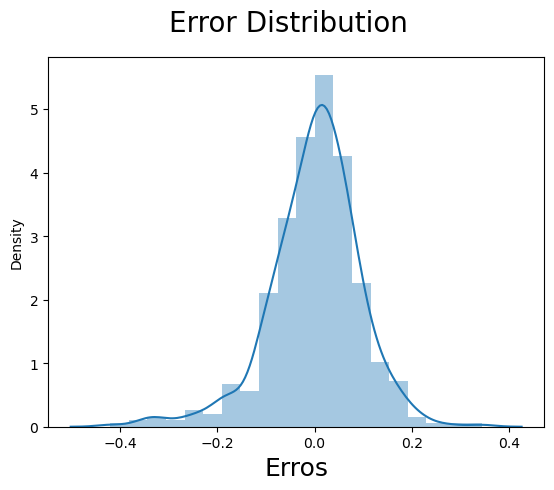

In [1022]:
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins=20)
fig.suptitle('Error Distribution', fontsize=20)
plt.xlabel('Erros', fontsize=18)
plt.show()

In [1023]:
# So its a normal distribution of errors as we can see in above graph

### 7. Making predicitons using our train model on test dataset

In [1024]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          220 non-null    int64  
 1   holiday     220 non-null    int64  
 2   workingday  220 non-null    int64  
 3   temp        220 non-null    float64
 4   atemp       220 non-null    float64
 5   hum         220 non-null    float64
 6   windspeed   220 non-null    float64
 7   cnt         220 non-null    int64  
 8   summer      220 non-null    uint8  
 9   fall        220 non-null    uint8  
 10  winter      220 non-null    uint8  
 11  mist        220 non-null    uint8  
 12  light snow  220 non-null    uint8  
 13  mon         220 non-null    uint8  
 14  tue         220 non-null    uint8  
 15  wed         220 non-null    uint8  
 16  thu         220 non-null    uint8  
 17  fri         220 non-null    uint8  
 18  sat         220 non-null    uint8  
 19  feb         220 non-null   

In [1025]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,1,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,1,...,0,0,0,0,0,1,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,1,0,...,0,0,0,1,0,0,0,0,0,0


In [1026]:
num_vars = ['cnt','temp','atemp','hum','windspeed']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [1027]:
y_test = df_test.pop('cnt')
X_test = df_test

In [1028]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'summer', 'fall',
       'winter', 'mist', 'light snow'],
      dtype='object')

In [1029]:
# storing final predictors in a list

final_pred_vars = X_train.columns

In [1030]:
final_pred_vars

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'summer', 'fall',
       'winter', 'mist', 'light snow'],
      dtype='object')

In [1031]:
# creating a seperate dataframe with final predictors of Model 5

X_test_m5 = X_test[final_pred_vars]

In [1032]:
X_test_m5.head()

,yr,holiday,workingday,temp,windspeed,summer,fall,winter,mist,light snow
184,0,1,0,0.837241,0.149393,0,1,0,1,0
535,1,0,1,0.911423,0.231142,1,0,0,0,0
299,0,0,0,0.496221,0.443398,0,0,1,1,0
221,0,0,1,0.890387,0.449707,0,1,0,0,0
152,0,0,0,0.821739,0.682387,1,0,0,0,0


In [1033]:
# Adding constant to test data for model 11

X_test_m5 = sm.add_constant(X_test_m5)

In [1034]:
# making predicitons of test data using Model 11

y_pred_m5 = lr_5.predict(X_test_m5)

### 8. Model Evaluation

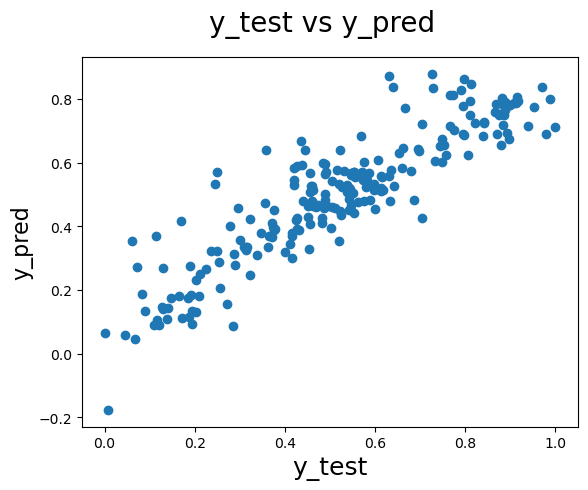

In [1035]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m5)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [1036]:
lr_5.params

const         0.156347
yr            0.233990
holiday      -0.103635
workingday   -0.022036
temp          0.465101
windspeed    -0.154743
summer        0.121897
fall          0.082744
winter        0.158599
mist         -0.076739
light snow   -0.279403
dtype: float64

##### So We our equation for best fitted line as per Model 7 is :

count = 0.232  \times  yr + (-0.103)  \times  holiday + (-0.022)  \times  workingday + 0.578  \times  temp + (-0.165) \times windspeed + 0.076 \times summer + 0.125 \times winter + (-0.072) \times mist + (-0.027) \times light snow

In [1037]:
# Lets check the Residual Vs Fitted values for error terms whether constant or not

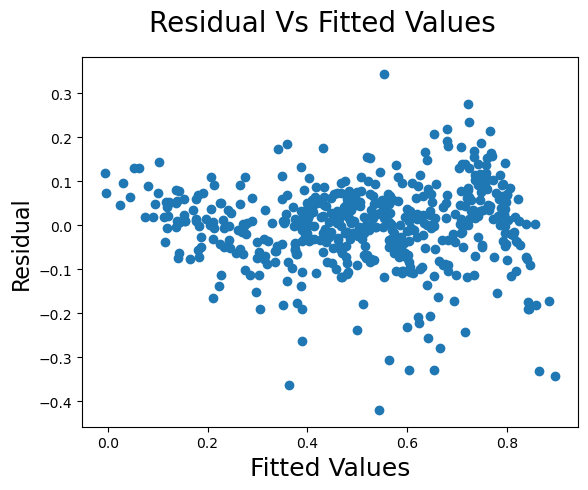

In [1038]:
fig = plt.figure()
plt.scatter(lr_5.fittedvalues,lr_5.resid)
fig.suptitle('Residual Vs Fitted Values', fontsize = 20)
plt.xlabel('Fitted Values', fontsize = 18)
plt.ylabel('Residual', fontsize = 16)
plt.show()

In [1039]:
# As we can see that there is no such any pattern in above plot, hence error terms are constant in nature

In [ ]:
# In train model R-squared is 82.4 and after model evaluation on test dataset we have R-squared 79.28

In [1040]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m5)

0.7927919554954996